In [1]:
import os, sys, re
import numpy as np
import pandas as pd
import platform
from IPython.display import display, clear_output, HTML
from datetime import datetime
import pickle

from time import sleep
from tqdm.auto import tqdm
from utils import logger, rule_base_predict, to_yolo

import selenium
from selenium.webdriver.common.by import By
from selenium.webdriver import Firefox, ActionChains
from selenium.webdriver.common.keys import Keys

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba

START_TS = datetime.now()

2021-05-24 12:15:02,218 -INFO - config:config.py:16 - Module utils.config was loaded
2021-05-24 12:15:02,222 -INFO - common:common.py:568 - Module utils.common is loaded...
2021-05-24 12:15:02,225 -INFO - dataset_builder:dataset_builder.py:244 - dataset package is loaded...
2021-05-24 12:15:03,005 -INFO - dataset:dataset.py:627 - dataset package is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

In [4]:
SITE_URL = 'https://jdi-testing.github.io/jdi-light/'
LOGIN = 'Roman'
PASSWORD = 'Jdi1234'
SAVE_SCREEN = True
WAIT_TIME_SECONDS = 7
HEADLESS = True #False

## Parameters

In [7]:
pages = [
    'Textarea Autosize',
    'Buttons',
    'Button Groups',
    'Checkbox',
    'Floating Action Button',
    #'Date / Time',
    'Radio',
    'Select',
    'Slider',
    'Switch',
    'Text Field',
    'List',
    'Progress'
]

2021-05-24 12:21:48,626 -INFO - dataset_builder:dataset_builder.py:121 - Dataset name: material-ui-Textarea Autosize
2021-05-24 12:21:48,627 -INFO - dataset_builder:dataset_builder.py:130 - Create directories to save the dataset
2021-05-24 12:21:48,629 -INFO - dataset_builder:dataset_builder.py:165 - Creating driver
2021-05-24 12:21:49,703 -INFO - dataset_builder:dataset_builder.py:173 - Chrome web driver is created
2021-05-24 12:21:49,703 -INFO - <ipython-input-8-15a4986015d5>:<ipython-input-8-15a4986015d5>:6 - getting page


<selenium.webdriver.remote.webelement.WebElement (session="0fc203934dfe0dcbd90fa3d122e24aaa", element="61c246fd-f6fc-42d0-a820-ee329765f2b8")>

2021-05-24 12:22:05,616 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:22:12,621 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-Textarea Autosize.png
2021-05-24 12:22:12,760 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:22:13,183 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-Textarea Autosize.html
2021-05-24 12:22:13,195 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-Textarea Autosize.parquet


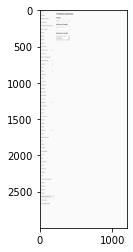

2021-05-24 12:22:13,775 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:22:13,832 -INFO - common:common.py:463 - Num radio buttons found: 0
2021-05-24 12:22:13,836 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:22:13,839 -INFO - common:common.py:471 - Num checkboxes found: 0
2021-05-24 12:22:13,842 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:22:13,846 -INFO - common:common.py:488 - Num textfields found: 0
2021-05-24 12:22:13,848 -INFO - common:common.py:493 - Num texfields for numbers found: 0
2021-05-24 12:22:13,851 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:22:13,854 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:22:13,856 -INFO - common:common.py:506 - Num buttons found: 0
2021-05-24 12:22:13,859 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 69
2021-05-24 12:22:13,862 -INFO - common:common.py:515 - Num links found: 0
20

<selenium.webdriver.remote.webelement.WebElement (session="fa51f9c24a39ea0b26c40e4e9c234efa", element="8945a8f5-d8d0-4bf1-be8d-ed3691ed87cd")>

2021-05-24 12:22:30,158 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:22:37,162 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-Buttons.png
2021-05-24 12:22:37,393 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:22:37,933 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-Buttons.html
2021-05-24 12:22:37,947 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-Buttons.parquet


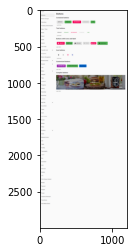

2021-05-24 12:22:38,371 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:22:38,431 -INFO - common:common.py:463 - Num radio buttons found: 0
2021-05-24 12:22:38,435 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:22:38,438 -INFO - common:common.py:471 - Num checkboxes found: 0
2021-05-24 12:22:38,441 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:22:38,444 -INFO - common:common.py:488 - Num textfields found: 0
2021-05-24 12:22:38,446 -INFO - common:common.py:493 - Num texfields for numbers found: 0
2021-05-24 12:22:38,449 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:22:38,451 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:22:38,453 -INFO - common:common.py:506 - Num buttons found: 24
2021-05-24 12:22:38,455 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 69
2021-05-24 12:22:38,458 -INFO - common:common.py:515 - Num links found: 2
2

<selenium.webdriver.remote.webelement.WebElement (session="b9a078881939b53a60ae982844041068", element="26e163e3-3160-426c-82cb-2cff9710287b")>

2021-05-24 12:22:54,992 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:23:02,006 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-Button Groups.png
2021-05-24 12:23:02,149 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:23:02,619 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-Button Groups.html
2021-05-24 12:23:02,632 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-Button Groups.parquet


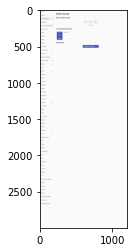

2021-05-24 12:23:03,045 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:23:03,105 -INFO - common:common.py:463 - Num radio buttons found: 0
2021-05-24 12:23:03,107 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:23:03,109 -INFO - common:common.py:471 - Num checkboxes found: 0
2021-05-24 12:23:03,112 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:23:03,116 -INFO - common:common.py:488 - Num textfields found: 0
2021-05-24 12:23:03,118 -INFO - common:common.py:493 - Num texfields for numbers found: 0
2021-05-24 12:23:03,120 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:23:03,122 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:23:03,125 -INFO - common:common.py:506 - Num buttons found: 8
2021-05-24 12:23:03,127 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 69
2021-05-24 12:23:03,129 -INFO - common:common.py:515 - Num links found: 0
20

<selenium.webdriver.remote.webelement.WebElement (session="1cd56cda1fcda177091c527943826f0a", element="f709611e-bcce-4d98-84ce-9a3f2dacd669")>

2021-05-24 12:23:19,562 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:23:26,569 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-Checkbox.png
2021-05-24 12:23:26,713 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:23:27,313 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-Checkbox.html
2021-05-24 12:23:27,326 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-Checkbox.parquet


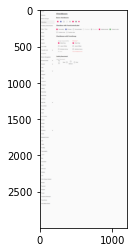

2021-05-24 12:23:27,770 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:23:27,892 -INFO - common:common.py:463 - Num radio buttons found: 0
2021-05-24 12:23:27,894 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:23:27,897 -INFO - common:common.py:471 - Num checkboxes found: 27
2021-05-24 12:23:27,900 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:23:27,902 -INFO - common:common.py:488 - Num textfields found: 0
2021-05-24 12:23:27,905 -INFO - common:common.py:493 - Num texfields for numbers found: 0
2021-05-24 12:23:27,908 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:23:27,911 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:23:27,913 -INFO - common:common.py:506 - Num buttons found: 0
2021-05-24 12:23:27,916 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 69
2021-05-24 12:23:27,918 -INFO - common:common.py:515 - Num links found: 0
2

<selenium.webdriver.remote.webelement.WebElement (session="aabc7e176b5dd5a2808293eec9d6f0cc", element="5da925be-11b3-4ad1-918b-0e6ab92b6a67")>

2021-05-24 12:23:44,532 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:23:51,532 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-Floating Action Button.png
2021-05-24 12:23:51,673 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:23:52,148 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-Floating Action Button.html
2021-05-24 12:23:52,160 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-Floating Action Button.parquet


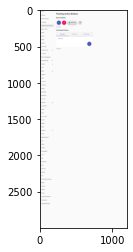

2021-05-24 12:23:52,595 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:23:52,643 -INFO - common:common.py:463 - Num radio buttons found: 0
2021-05-24 12:23:52,649 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:23:52,651 -INFO - common:common.py:471 - Num checkboxes found: 0
2021-05-24 12:23:52,655 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:23:52,658 -INFO - common:common.py:488 - Num textfields found: 0
2021-05-24 12:23:52,661 -INFO - common:common.py:493 - Num texfields for numbers found: 0
2021-05-24 12:23:52,663 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:23:52,666 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:23:52,668 -INFO - common:common.py:506 - Num buttons found: 8
2021-05-24 12:23:52,671 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 69
2021-05-24 12:23:52,673 -INFO - common:common.py:515 - Num links found: 0
20

<selenium.webdriver.remote.webelement.WebElement (session="99cd5457d962efa563e5d024fee2a5c4", element="21413c2a-4880-457f-b7cf-1ed953d9908b")>

2021-05-24 12:24:09,076 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:24:16,081 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-Radio.png
2021-05-24 12:24:16,222 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:24:16,749 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-Radio.html
2021-05-24 12:24:16,764 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-Radio.parquet


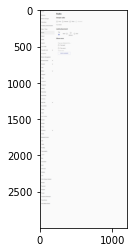

2021-05-24 12:24:17,188 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:24:17,301 -INFO - common:common.py:463 - Num radio buttons found: 10
2021-05-24 12:24:17,304 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:24:17,306 -INFO - common:common.py:471 - Num checkboxes found: 0
2021-05-24 12:24:17,309 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:24:17,313 -INFO - common:common.py:488 - Num textfields found: 0
2021-05-24 12:24:17,316 -INFO - common:common.py:493 - Num texfields for numbers found: 0
2021-05-24 12:24:17,319 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:24:17,322 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:24:17,324 -INFO - common:common.py:506 - Num buttons found: 1
2021-05-24 12:24:17,327 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 69
2021-05-24 12:24:17,330 -INFO - common:common.py:515 - Num links found: 0
2

<selenium.webdriver.remote.webelement.WebElement (session="e73cf1ae82c21c42b0b01507eb746e37", element="70e38152-7ec4-4a9f-aa98-8407c3249dc2")>

2021-05-24 12:24:33,598 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:24:40,603 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-Select.png
2021-05-24 12:24:40,757 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:24:41,335 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-Select.html
2021-05-24 12:24:41,351 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-Select.parquet


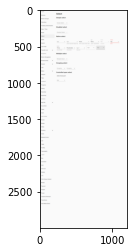

2021-05-24 12:24:41,775 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:24:41,838 -INFO - common:common.py:463 - Num radio buttons found: 0
2021-05-24 12:24:41,841 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:24:41,844 -INFO - common:common.py:471 - Num checkboxes found: 0
2021-05-24 12:24:41,847 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:24:41,850 -INFO - common:common.py:488 - Num textfields found: 0
2021-05-24 12:24:41,853 -INFO - common:common.py:493 - Num texfields for numbers found: 0
2021-05-24 12:24:41,856 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:24:41,858 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:24:41,860 -INFO - common:common.py:506 - Num buttons found: 1
2021-05-24 12:24:41,862 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 74
2021-05-24 12:24:41,865 -INFO - common:common.py:515 - Num links found: 0
20

<selenium.webdriver.remote.webelement.WebElement (session="557e0daef76ed8649a83497db33f7f26", element="c3d99c0b-0b0d-4d9b-a1a5-bfc9d177b632")>

2021-05-24 12:24:58,497 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:25:05,510 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-Slider.png
2021-05-24 12:25:05,660 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:25:06,194 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-Slider.html
2021-05-24 12:25:06,203 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-Slider.parquet


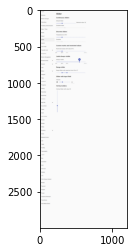

2021-05-24 12:25:06,642 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:25:06,713 -INFO - common:common.py:463 - Num radio buttons found: 0
2021-05-24 12:25:06,713 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:25:06,718 -INFO - common:common.py:471 - Num checkboxes found: 0
2021-05-24 12:25:06,721 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:25:06,724 -INFO - common:common.py:488 - Num textfields found: 0
2021-05-24 12:25:06,726 -INFO - common:common.py:493 - Num texfields for numbers found: 1
2021-05-24 12:25:06,730 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:25:06,732 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:25:06,734 -INFO - common:common.py:506 - Num buttons found: 0
2021-05-24 12:25:06,737 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 69
2021-05-24 12:25:06,739 -INFO - common:common.py:515 - Num links found: 0
20

<selenium.webdriver.remote.webelement.WebElement (session="b413a2da6053521ad7e67a8da919a800", element="45193e9b-0c9e-48f1-8d33-d246cf10570e")>

2021-05-24 12:25:23,425 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:25:30,437 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-Switch.png
2021-05-24 12:25:30,587 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:25:31,095 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-Switch.html
2021-05-24 12:25:31,104 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-Switch.parquet


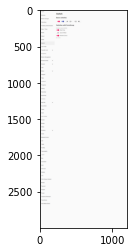

2021-05-24 12:25:31,596 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:25:31,659 -INFO - common:common.py:463 - Num radio buttons found: 0
2021-05-24 12:25:31,661 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:25:31,664 -INFO - common:common.py:471 - Num checkboxes found: 9
2021-05-24 12:25:31,667 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:25:31,669 -INFO - common:common.py:488 - Num textfields found: 0
2021-05-24 12:25:31,672 -INFO - common:common.py:493 - Num texfields for numbers found: 0
2021-05-24 12:25:31,676 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:25:31,679 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:25:31,681 -INFO - common:common.py:506 - Num buttons found: 0
2021-05-24 12:25:31,683 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 69
2021-05-24 12:25:31,686 -INFO - common:common.py:515 - Num links found: 0
20

<selenium.webdriver.remote.webelement.WebElement (session="67ef8640ae3b5cb92de67498e7126380", element="aa779fbb-eced-48e4-a7a2-d08e32c11200")>

2021-05-24 12:25:48,185 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:25:55,190 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-Text Field.png
2021-05-24 12:25:55,342 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:25:55,895 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-Text Field.html
2021-05-24 12:25:55,909 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-Text Field.parquet


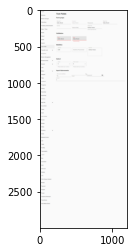

2021-05-24 12:25:56,344 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:25:56,457 -INFO - common:common.py:463 - Num radio buttons found: 0
2021-05-24 12:25:56,458 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:25:56,462 -INFO - common:common.py:471 - Num checkboxes found: 0
2021-05-24 12:25:56,463 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:25:56,467 -INFO - common:common.py:488 - Num textfields found: 9
2021-05-24 12:25:56,469 -INFO - common:common.py:493 - Num texfields for numbers found: 1
2021-05-24 12:25:56,469 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:25:56,472 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:25:56,474 -INFO - common:common.py:506 - Num buttons found: 1
2021-05-24 12:25:56,476 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 70
2021-05-24 12:25:56,478 -INFO - common:common.py:515 - Num links found: 0
20

<selenium.webdriver.remote.webelement.WebElement (session="52b93661bbcb25e9759a72df40e07b46", element="f346cedd-3e25-4eec-aab2-e01c9c326b4e")>

2021-05-24 12:26:12,761 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:26:19,773 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-List.png
2021-05-24 12:26:19,923 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:26:20,610 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-List.html
2021-05-24 12:26:20,621 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-List.parquet


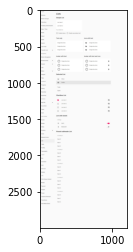

2021-05-24 12:26:21,056 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:26:43,471 -INFO - common:common.py:463 - Num radio buttons found: 0
2021-05-24 12:26:43,473 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:26:43,476 -INFO - common:common.py:471 - Num checkboxes found: 8
2021-05-24 12:26:43,479 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:26:43,481 -INFO - common:common.py:488 - Num textfields found: 0
2021-05-24 12:26:43,484 -INFO - common:common.py:493 - Num texfields for numbers found: 0
2021-05-24 12:26:43,486 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:26:43,488 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:26:43,489 -INFO - common:common.py:506 - Num buttons found: 7
2021-05-24 12:26:43,491 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 74
2021-05-24 12:26:43,493 -INFO - common:common.py:515 - Num links found: 0
20

<selenium.webdriver.remote.webelement.WebElement (session="bc0305afc974a3192fd6385a803cbfd0", element="c24fa997-2748-4e2c-9b1d-efbb91e757d1")>

2021-05-24 12:26:59,846 -INFO - common:common.py:75 - Window maximized
2021-05-24 12:27:06,862 -INFO - dataset_builder:dataset_builder.py:176 - save scrinshot: dataset/images/material-ui-Progress.png
2021-05-24 12:27:07,038 -INFO - dataset_builder:dataset_builder.py:220 - Collect features using JS script
2021-05-24 12:27:07,561 -INFO - dataset_builder:dataset_builder.py:228 - Save html to dataset/html/material-ui-Progress.html
2021-05-24 12:27:07,572 -INFO - dataset_builder:dataset_builder.py:238 - Save parquet to dataset/df/material-ui-Progress.parquet


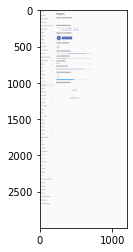

2021-05-24 12:27:08,118 -INFO - dataset_builder:dataset_builder.py:143 - Close web driver
2021-05-24 12:27:08,174 -INFO - common:common.py:463 - Num radio buttons found: 0
2021-05-24 12:27:08,176 -INFO - common:common.py:467 - Num radio2 buttons found: 0
2021-05-24 12:27:08,178 -INFO - common:common.py:471 - Num checkboxes found: 0
2021-05-24 12:27:08,181 -INFO - common:common.py:477 - Num comboboxes/dropdowns found: 0
2021-05-24 12:27:08,183 -INFO - common:common.py:488 - Num textfields found: 0
2021-05-24 12:27:08,185 -INFO - common:common.py:493 - Num texfields for numbers found: 0
2021-05-24 12:27:08,187 -INFO - common:common.py:498 - Num ranges found: 0
2021-05-24 12:27:08,189 -INFO - common:common.py:503 - Num ordinary text inputs found: 0
2021-05-24 12:27:08,190 -INFO - common:common.py:506 - Num buttons found: 4
2021-05-24 12:27:08,192 -INFO - common:common.py:511 - Num buttons2 (Material-UI) found: 69
2021-05-24 12:27:08,193 -INFO - common:common.py:515 - Num links found: 0


In [8]:
for PAGE in pages:
    DATASET_NAME = f'material-ui-{PAGE}'

    class JDIDatasetBuilder(DatasetBuilder):
        def setUp(self, driver):
            self.logger.info(f'getting page')
            driver.get(SITE_URL)

            driver.set_window_size(width=1200, height=3000)
            driver.find_element_by_id("user-icon").click()
            driver.find_element_by_id("name").send_keys(LOGIN)
            driver.find_element_by_id("password").send_keys(PASSWORD)
            driver.find_element_by_id("login-button").click()
            sleep(WAIT_TIME_SECONDS)

            driver.set_window_size(width=1200, height=3000)
            driver.find_element(By.LINK_TEXT, "Elements packs").click()
            driver.find_element(By.LINK_TEXT, "Material UI").click()
            el = driver.find_element(By.XPATH, f'//span[text()="{PAGE}"]')
            el.click()
            display(el)
            sleep(WAIT_TIME_SECONDS)

            #self.full_page(driver=driver)

            maximize_window(driver=driver)
            sleep(WAIT_TIME_SECONDS)


    with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True) as builder:
        elements_df = builder.dataset
        img = plt.imread(f'dataset/images/{DATASET_NAME}.png')
        plt.imshow(img)
        plt.show()


    df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
    controls_df = rule_base_predict(df)
    controls_df

    controls_df['yolo'] = controls_df.apply(
        lambda r: to_yolo(label=r['label'],  
                          x=r['x'], 
                          y=r['y'], 
                          w=r['width'], 
                          h=r['height'], 
                          img_width=img.shape[1], 
                          img_height=img.shape[0]), 
        axis=1
    )

    labeled_df = pd.DataFrame(controls_df.yolo.values.tolist(), columns=['label', 'x', 'y', 'width', 'height'])
    # display(labeled_df)
    labeled_df.to_csv(f'dataset/annotations/{DATASET_NAME}.txt', header=False, sep=' ', index=False)


